# Exploratory Data Analysis (EDA) and essay

## ***Introduction***

*This assignment focuses on one of the most important aspects of data science, Exploratory Data Analysis (EDA). Many surveys show that data scientists spend 60-80% of their time on data preparation. EDA allows you to identify data gaps & data imbalances, improve data quality, create better features and gain a deep understanding of your data before doing model training - and that ultimately helps train better models. In machine learning, there is a saying - "better data beats better algorithms" - meaning that it is more productive to spend time improving data quality than improving the code to train the model.*

*This will be an exploratory exercise, so feel free to show errors and warnings that arise during the analysis.*

## ***Dataset***

*A Portuguese bank conducted a marketing campaign (phone calls) to predict if a client will subscribe to a term deposit. The records of their efforts are available in the form of a dataset. The objective here is to apply machine learning techniques to analyze the dataset and figure out most effective tactics that will help the bank in next campaign to persuade more customers to subscribe to the bank's term deposit. Download the Bank Marketing Dataset from: https://archive.ics.uci.edu/dataset/222/bank+marketing.*

## ***Assignment***

1. ***Exploratory Data Analysis***

    *Review the structure and content of the data and answer questions such as:*
    - *Are the features (columns) of your data correlated?*
    - *What is the overall distribution of each variable?*
    - *Are there any outliers present?*
    - *What are the relationships between different variables?*
    - *How are categorical variables distributed?*
    - *Do any patterns or trends emerge in the data?*
    - *What is the central tendency and spread of each variable?*
    - *Are there any missing values and how significant are they?* 

2. ***Algorithm Selection***

    *Now you have completed the EDA, what Algorithms would suit the business purpose for the dataset. Answer questions such as:*
    - *Select two or more machine learning algorithms presented so far that could be used to train a model (no need to train models - I am only looking for your recommendations).*
    - *What are the pros and cons of each algorithm you selected?*
    - *Which algorithm would you recommend, and why?*
    - *Are there labels in your data? Did that impact your choice of algorithm?*
    - *How does your choice of algorithm relates to the dataset?*
    - *Would your choice of algorithm change if there were fewer than 1,000 data records, and why?*

3. ***Pre-processing***

    *Now you have done an EDA and selected an Algorithm, what pre-processing (if any) would you require for:*
    - *Data Cleaning - improve data quality, address missing data, etc.*
    - *Dimensionality Reduction - remove correlated/redundant data than will slow down training*
    - *Feature Engineering - use of business knowledge to create new features*
    - *Sampling Data - using sampling to resize datasets*
    - *Data Transformation - regularization, normalization, handling categorical variables*
    - *Imbalanced Data - reducing the imbalance between classes*

## Step 1: Exploratory Data Analysis

First, we import libraries and load the dataset.

In [12]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import numpy as np
import zipfile
import io
import requests

We use `bank-additional-full.csv` with all examples, ordered by date (from May 2008 to November 2010). The data is enriched from the "Bank Marketing" UCI dataset by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb. This dataset is almost identical to the original, but it was found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included.

We load the data and display the first few rows to understand its structure.

In [2]:
# Download the zip file from the internet
url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
response = requests.get(url)

# Extract bank-additional.zip from the downloaded zip
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('bank-additional.zip') as additional_zip_file:
        with zipfile.ZipFile(additional_zip_file) as additional_zip:
            # Extract bank-additional-full.csv from bank-additional.zip
            with additional_zip.open('bank-additional/bank-additional-full.csv') as csvfile:
                df = pd.read_csv(csvfile, sep=';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Numerical Values
The features of our data are correlated. We visualize correlation between variables and print the top 5 most highly correlated numeric column pairs below.

> NOTE: We may need to convert categorical variables to numeric using one-hot encoding or label encoding to compute correlations. Right now, we only look at numeric columns.

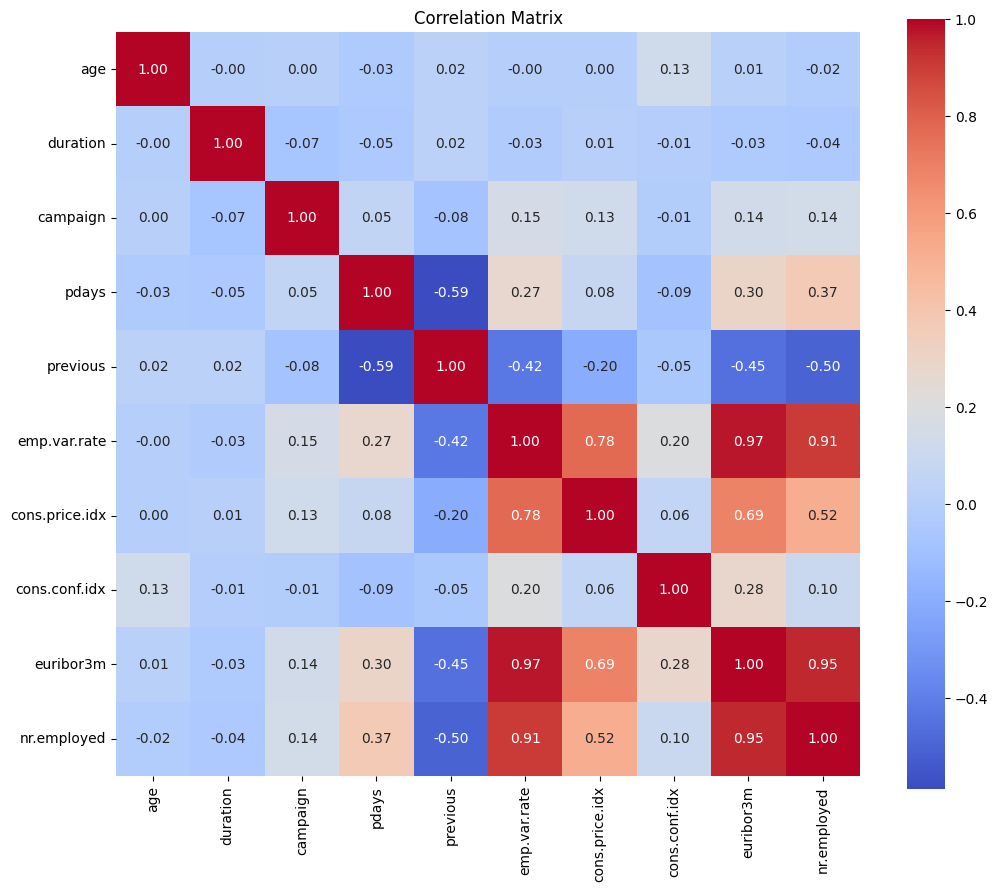

`emp.var.rate` is highly positively correlated with `euribor3m` (0.97).
`euribor3m` is highly positively correlated with `nr.employed` (0.95).
`emp.var.rate` is highly positively correlated with `nr.employed` (0.91).
`emp.var.rate` is highly positively correlated with `cons.price.idx` (0.78).
`cons.price.idx` is highly positively correlated with `euribor3m` (0.69).


In [3]:
# Create correlation matrix for numeric columns only
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Get the absolute correlation matrix and set diagonal to 0 to ignore self-correlation
high_corr = corr_matrix.unstack().to_frame('correlation') # Unstack the correlation matrix
high_corr['sign'] = np.where(high_corr['correlation'] >= 0, 'positive', 'negative') # Add a new column indicating if the correlation is positive or negative
high_corr['correlation'] = high_corr['correlation'].abs().drop_duplicates()
high_corr = high_corr[high_corr['correlation'] < 1]
high_corr = high_corr.sort_values(by='correlation', ascending=False)

for (var1, var2), row in high_corr.head(5).iterrows():
    print(f"`{var1}` is highly {row['sign']}ly correlated with `{var2}` ({row['correlation']:.2f}).")


The pairs (`emp.var.rate`,`euribor3m`) and (`euribor3m`, `nr.employed`) are highly correlated with eachother which makes two of these columns a good candidate for removal from the dataset.

### Categorical Variables
We visaulize the overall distribution of each variable below by looking at a series of stacked bar charts to see which categories are stronger predictors of a `Yes` or `No` determination.

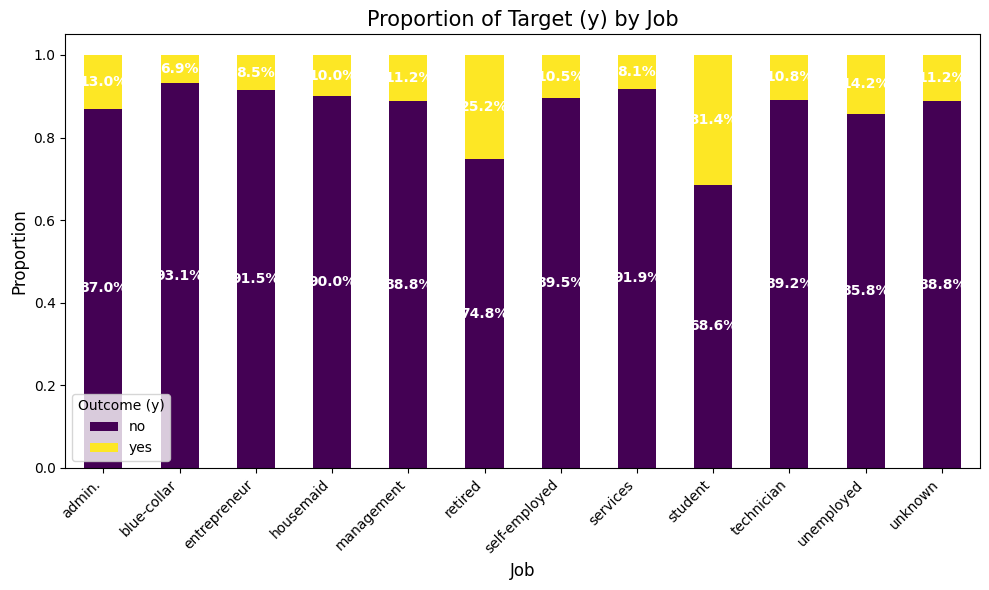

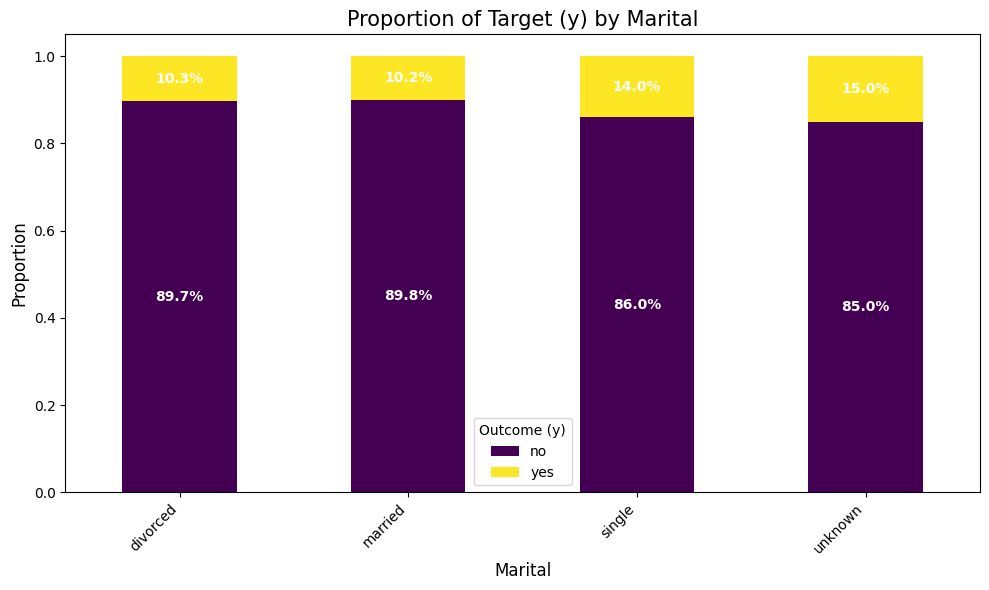

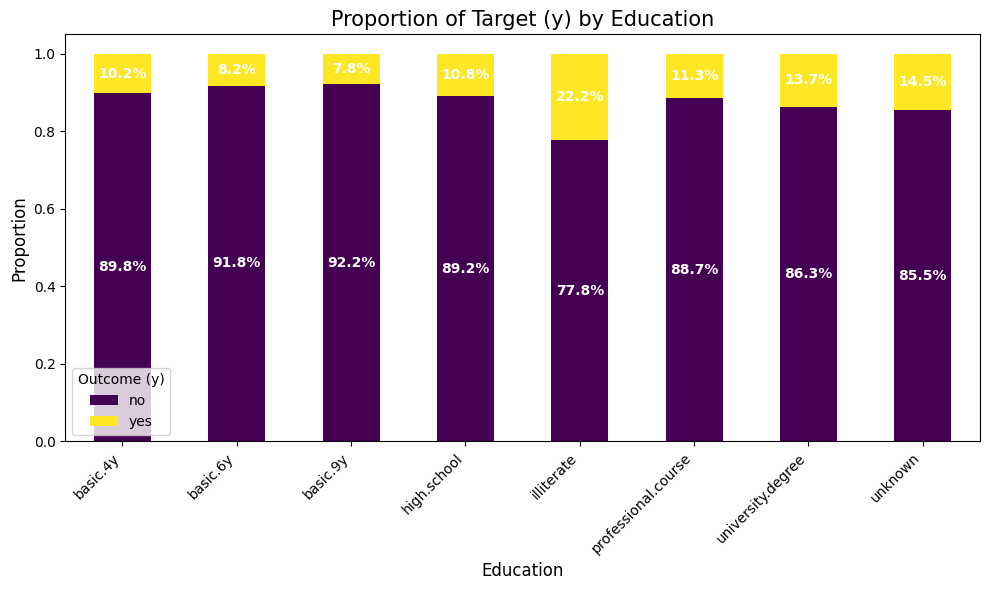

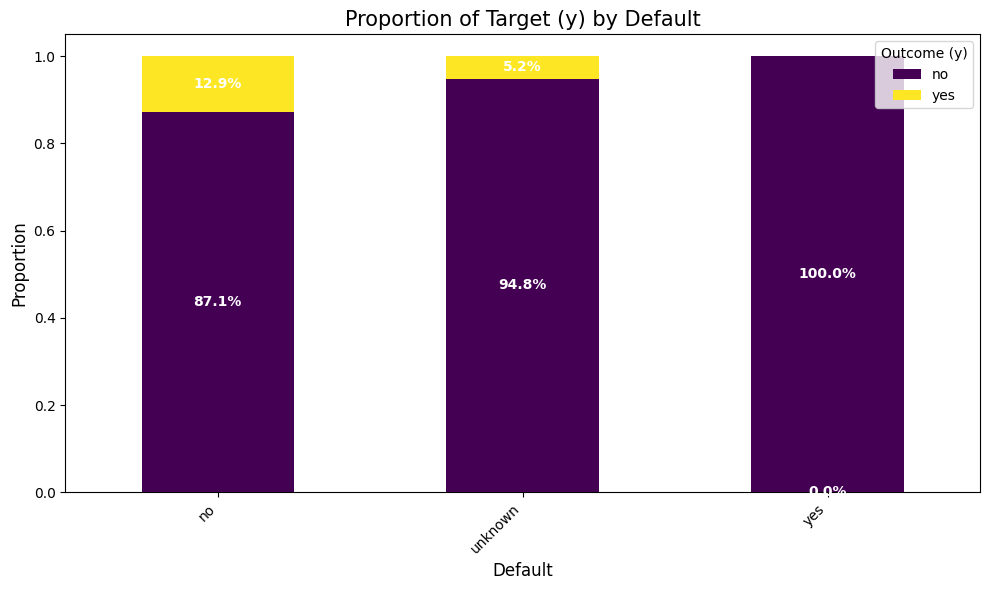

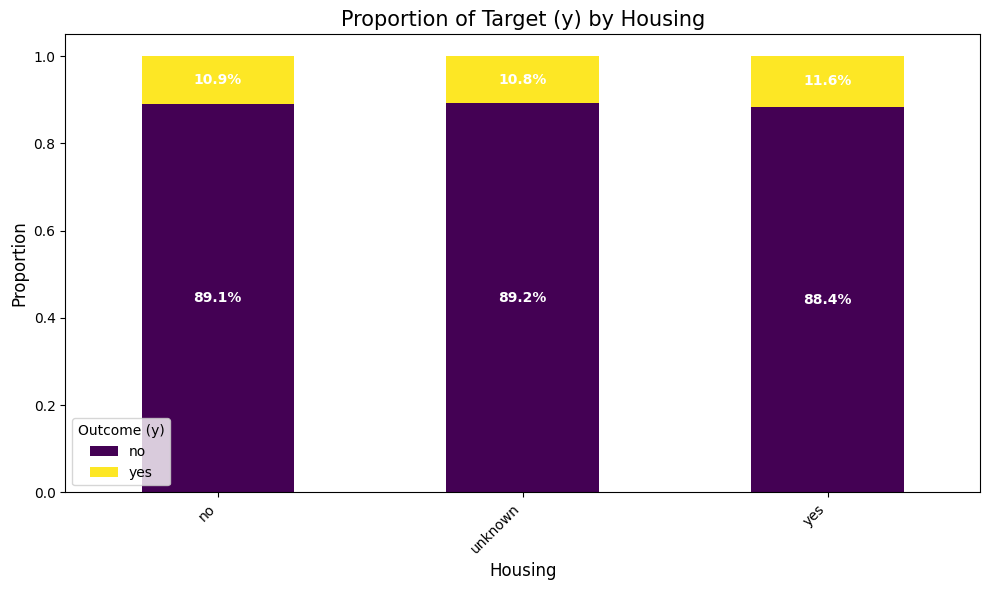

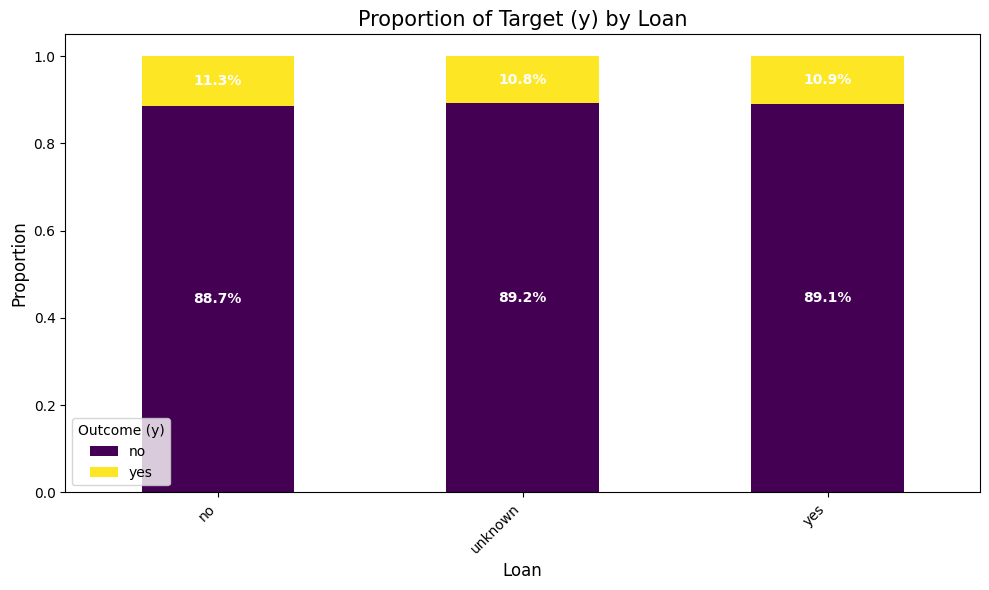

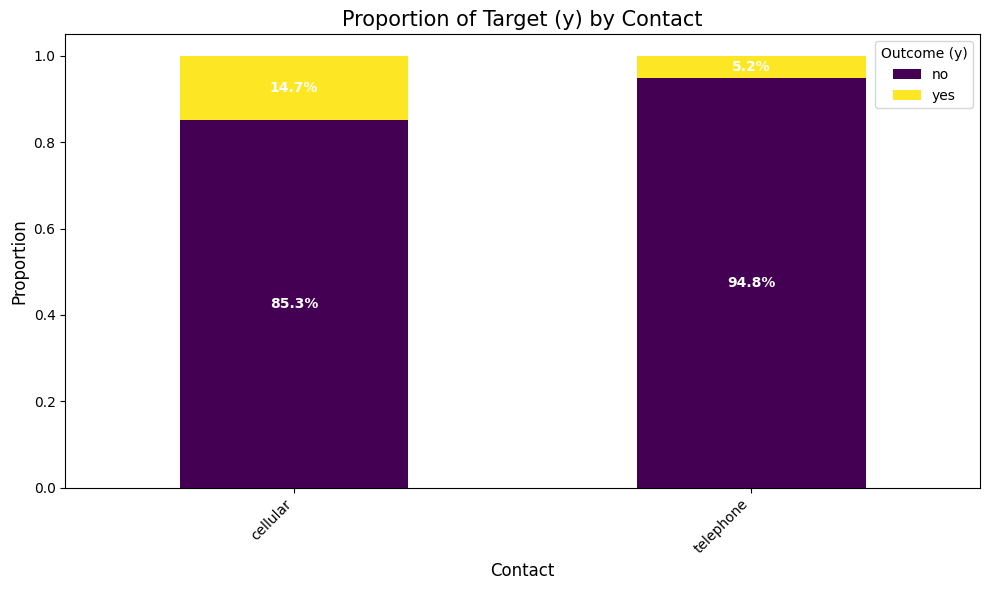

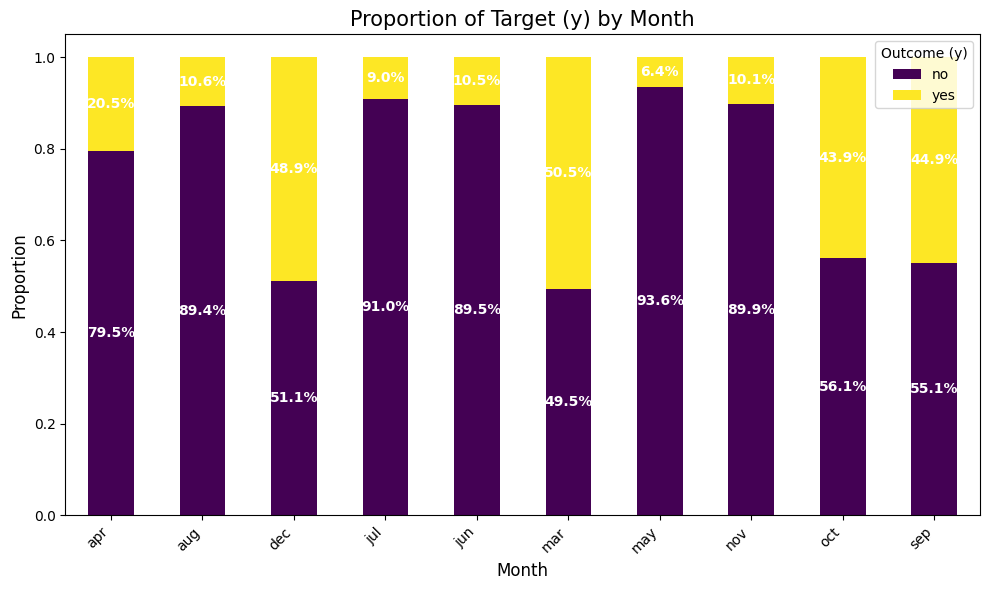

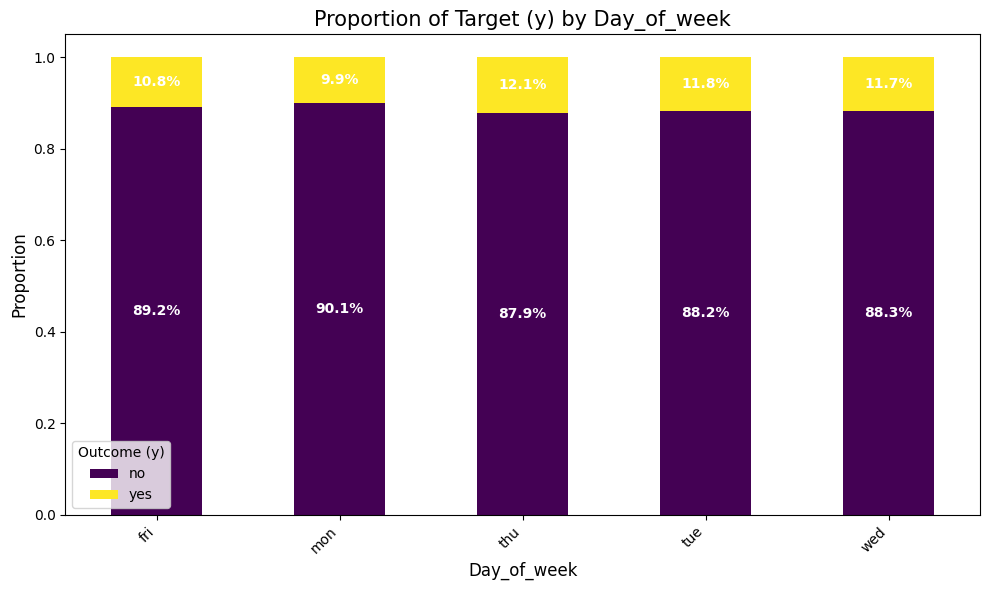

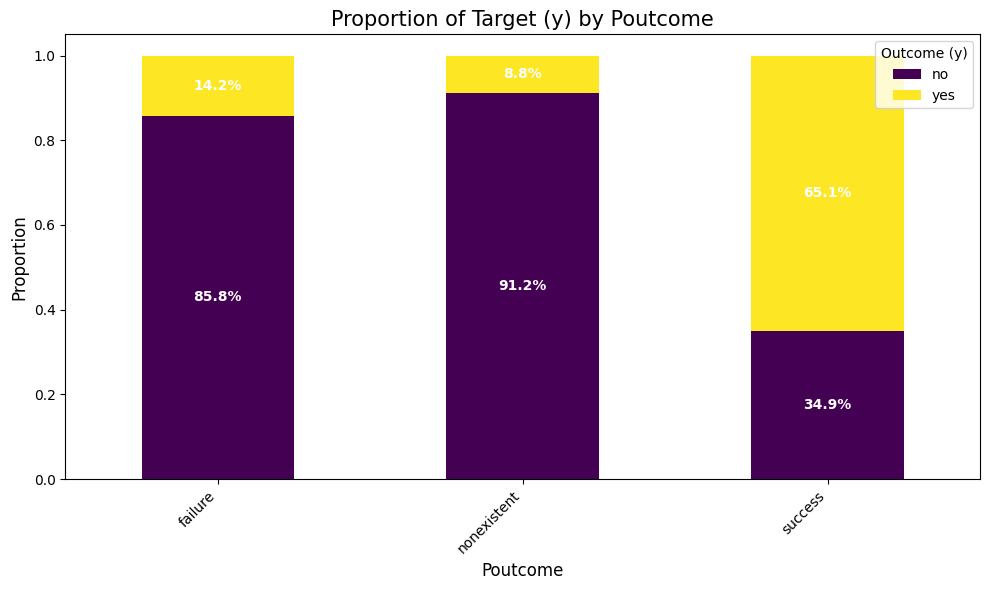

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns.drop('y')

for column in categorical_columns:
    # Create a crosstab to get the proportions.
    # normalize='index' calculates percentages row-wise (to sum to 100% for each category)
    crosstab_df = pd.crosstab(df[column], df['y'], normalize='index')

    # Create the plot
    ax = crosstab_df.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        colormap='viridis' # Using a different colormap for variety
    )

    # Add formatting for clarity
    plt.title(f"Proportion of Target (y) by {column.capitalize()}", fontsize=15)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Outcome (y)')
    plt.tight_layout() # Ensures labels don't get cut off

    # Add percentage labels inside the bars for readability
    for container in ax.containers:
        ax.bar_label(container, fmt='{:.1%}', label_type='center', color='white', weight='bold')

    # Display the plot (optional, can be commented out if you just want to save files)
    plt.show()

[Insert takeaways from stacked bars here]

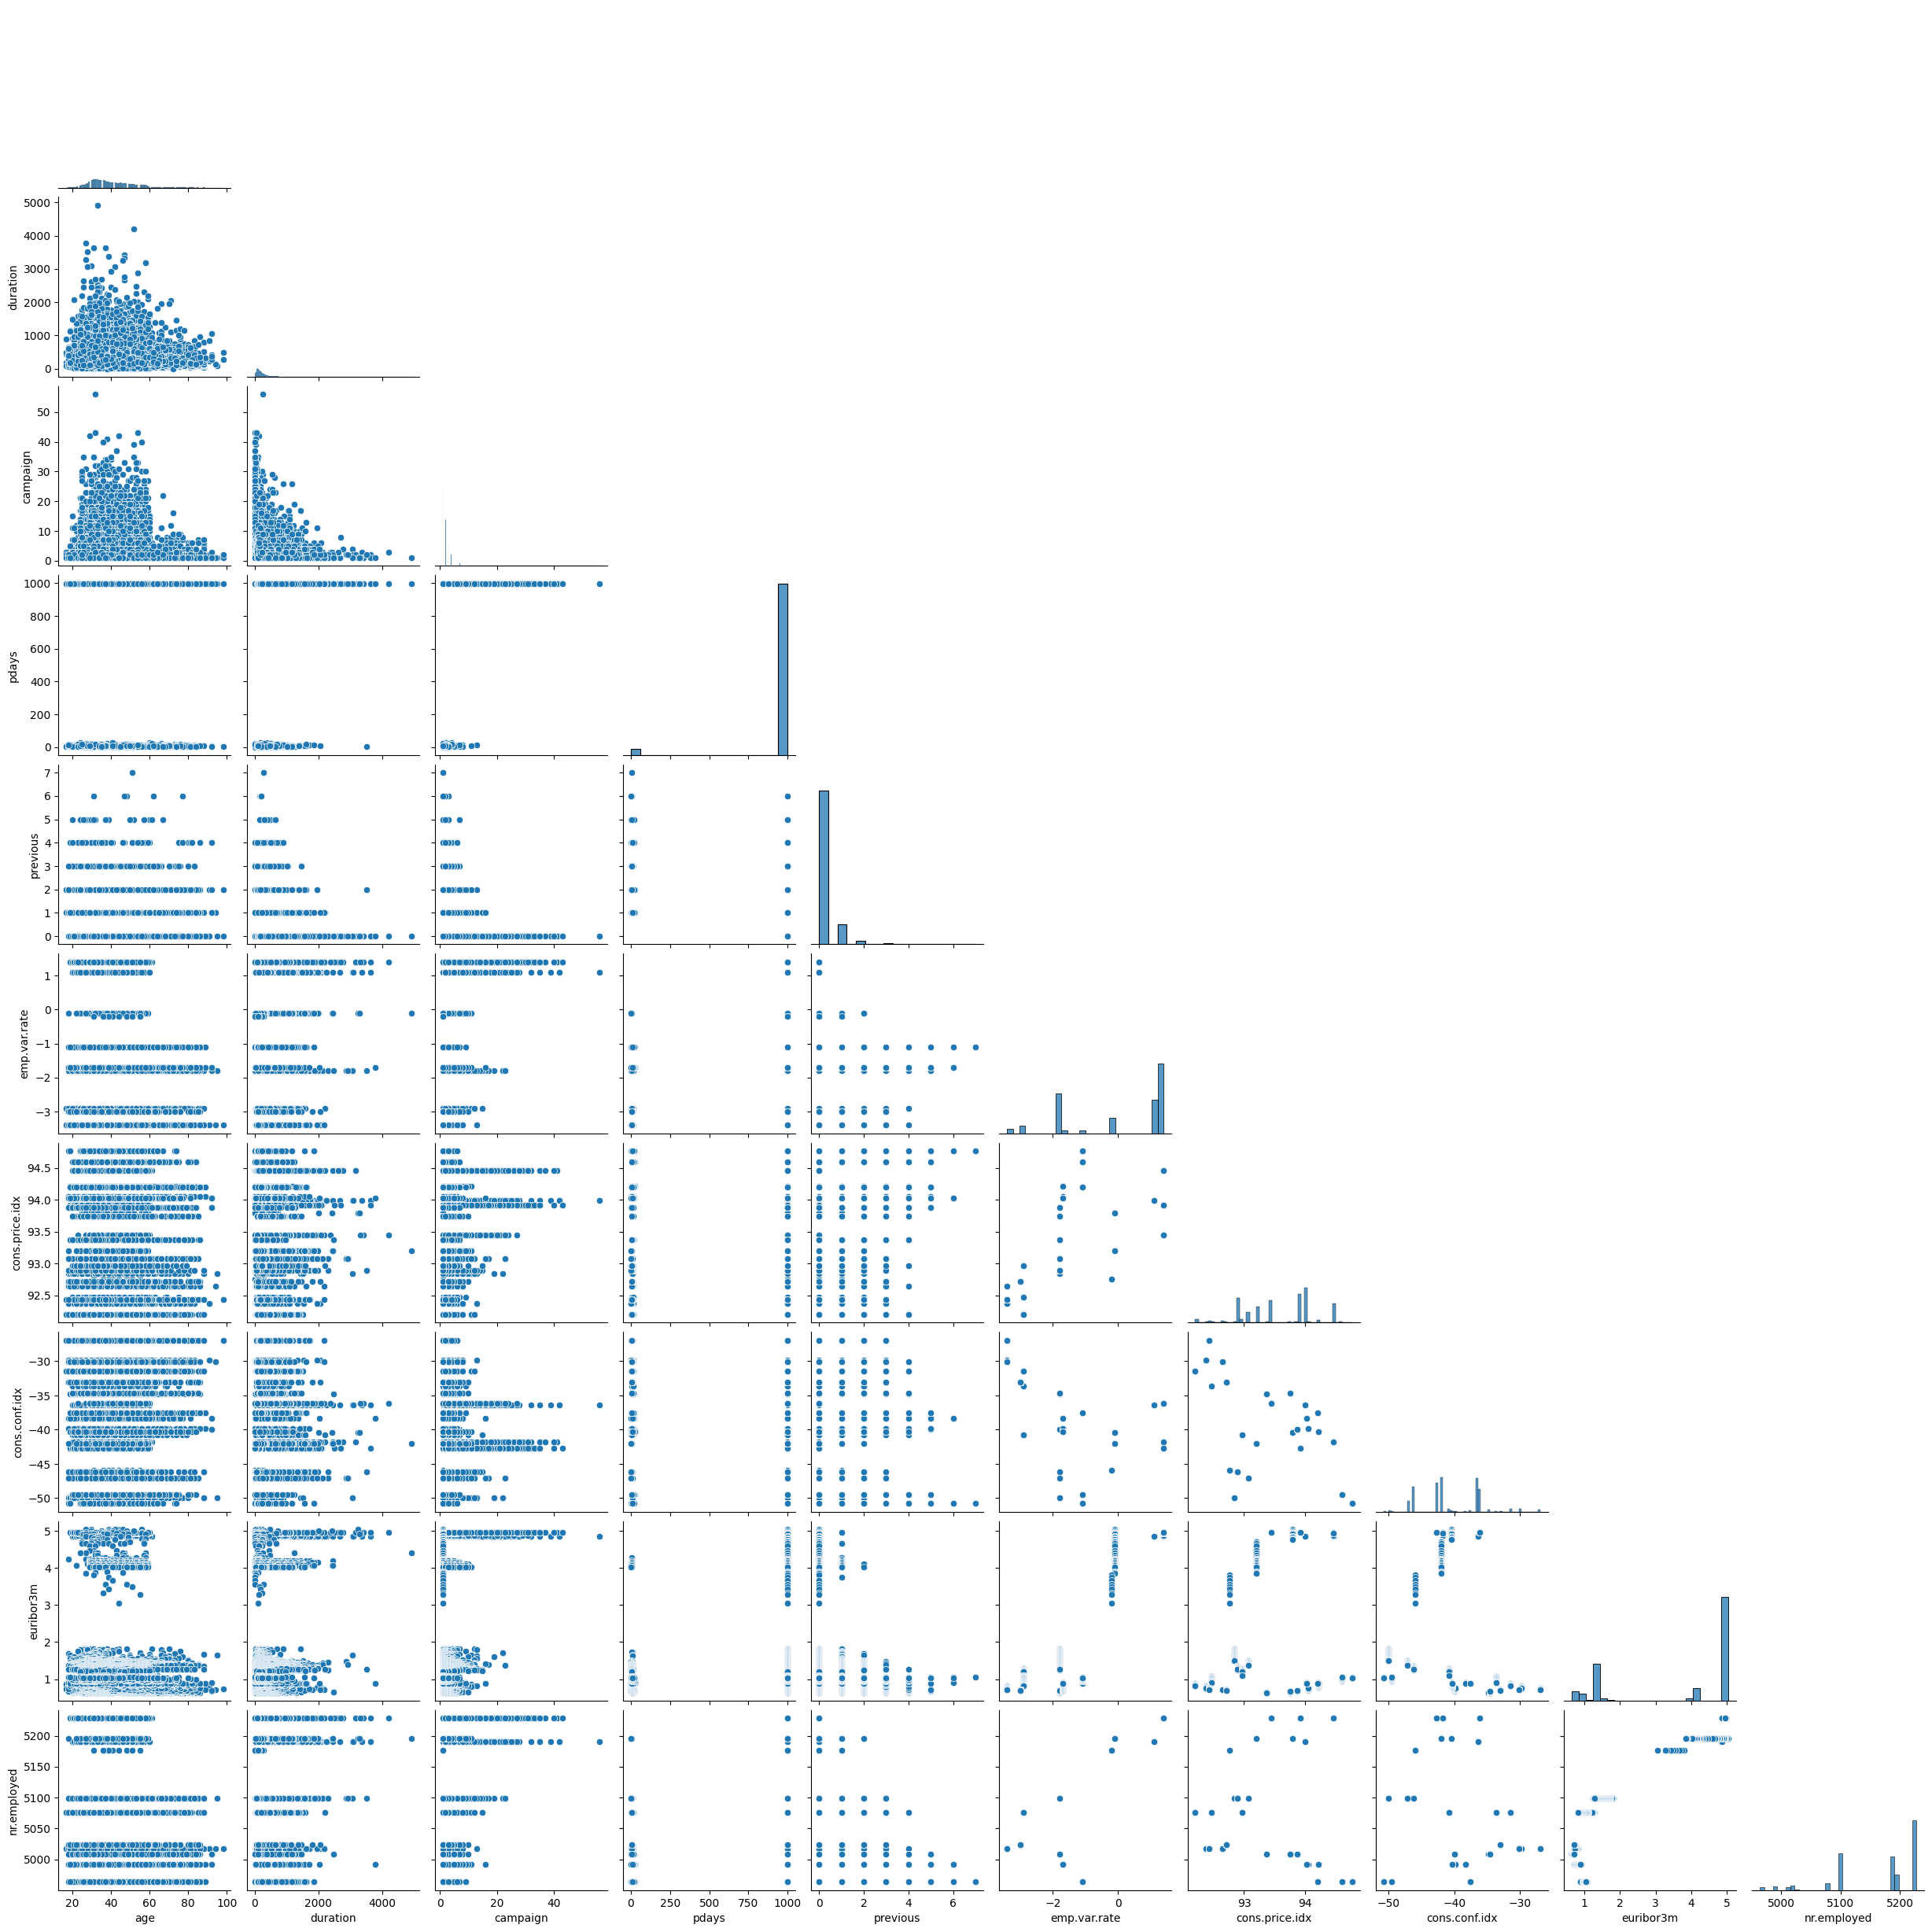

In [5]:
# Use pairplot to visualize relationships between variables
sns.pairplot(df, corner=True)
plt.show()

[Describe distributions, outliers, etc. above]

We check the central tendency and spread of each variable.

In [6]:
# Calculate central tendency and spread for each numeric variable
desc = df.describe(include=[np.number]).T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
display(desc)

# For categorical variables, show the mode and frequency
desc_cat = df.describe(include=['object']).T[['top', 'freq']]
display(desc_cat)

,mean,std,min,25%,50%,75%,max
age,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


,top,freq
job,admin.,10422
marital,married,24928
education,university.degree,12168
default,no,32588
housing,yes,21576
loan,no,33950
contact,cellular,26144
month,may,13769
day_of_week,thu,8623
poutcome,nonexistent,35563


There are no missing observations in this dataset.

In [7]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

However, there are some observations set as "unknown" in several categorical columns. We will treat these as missing values.

In [8]:
# Check for categorical variables that are "unknown" and replace 'unknown' with np.nan in all object (categorical) columns
df_nas = df.copy()
df_nas = df_nas.replace('unknown', np.nan)

# Check for categorical variables that are now NA
na_counts = df_nas.isna().sum()
na_counts = na_counts[na_counts > 0].sort_values(ascending=False)
na_perc = (na_counts / len(df_nas)) * 100
print("Columns with NA values and their % missing:")
print(na_perc.round(2))

Columns with NA values and their % missing:
default      20.87
education     4.20
housing       2.40
loan          2.40
job           0.80
marital       0.19
dtype: float64


`default` (whether or not the client has credit in default) has significant missingness. `education` (education level), `housing` (whether the client has a housing loan), `loan` (whether the client has a personal loan), `job` (type of job), and `marital` (marital status) have some minor missingness. We will address this missingness in the Pre-processing section.

## Step 2: Algorithm Selection

Now that we've completed the EDA, we select the following machine learning algorithms to train a model:

> NOTE: Richie, what algorithms shall we use? I got us started below.
- x1
    - Pros:
    - Cons:
- x2 
    - Pros:
    - Cons:

We recommend x1 because of yyy. 


Yes, there are labels in our data (yes/no for term deposit subscription). This impacts our choice of algorithm because we are looking at classification algorithms.
    
How does your choice of algorithm relates to the dataset?
Would your choice of algorithm change if there were fewer than 1,000 data records, and why?

## Step 3: Pre-processing

### Data cleaning

Since `default` has significant missingness (21%) and most clients with known data are not in default (79% no, <1% yes), we will drop this column, since there is little risk of losing valuable information that our classifier needs to discriminate between classes. For the other columns with minor missingness (`education`, `housing`, `loan`, `job`, and `marital`), we will drop rows with missing data. Since the missingness is low, we will not lose much information by dropping these rows.



In [11]:
# Save a new dataframe for preprocessing
df_clean = df_nas.copy()

# Remove `default` column due to high missingness
df_clean = df_clean.drop(columns=['default'])

# Drop rows with missing values in other columns
df_clean = df_clean.dropna()

# Display ns before and after dropping missing values
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

Original dataset shape: (41188, 21)
Cleaned dataset shape: (38245, 20)


We still have sufficient data to model with, even after removing rows with missing values. 

### Feature Engineering

We map ordinal categorical variables to numeric values. In this case, we map the education levels to estimated number of years of schooling.

In [ ]:
# Map education levels to numeric values
education_mapping = {
    'illiterate': 0,                # 0 years
    'basic.4y': 4,                  # 4 years
    'basic.6y': 6,                  # 6 years
    'basic.9y': 9,                  # 9 years
    'high.school': 12,              # 12 years (typical for high school)
    'professional.course': 14,      # 14 years (post-secondary/professional)
    'university.degree': 16         # 16 years (bachelor's degree)
}
df_clean['education'] = df_clean['education'].map(education_mapping)

### Data Transformation

We use one-hot encoding for nominal categorical variables. This will allow us to use algorithms that require numeric input.

In [10]:
# One-hot encode nominal categorical variables
df_clean = pd.get_dummies(df_clean, columns=['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

We also standardardize numerical columns since the majority of machine learning and optimization algorithms behave much better if features are on the same scale. We are using `RobustScaler()` to reduce the influence of outliers.

> NOTE: Remove this if we decide to decision trees or random forests since they do not require standardization. 

In [ ]:
# Identify numerical columns
num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_standardized = df_clean.copy()
scaler = RobustScaler()

# Fit and transform the numerical columns
df_standardized[num_cols] = scaler.fit_transform(df_standardized[num_cols])

df_standardized.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.200000,housemaid,married,basic.4y,no,no,telephone,may,mon,0.373272,-0.5,0.0,0.0,nonexistent,0.0,0.598477,0.857143,0.0,0.0,no
1,1.266667,services,married,high.school,no,no,telephone,may,mon,-0.142857,-0.5,0.0,0.0,nonexistent,0.0,0.598477,0.857143,0.0,0.0,no
2,-0.066667,services,married,high.school,yes,no,telephone,may,mon,0.211982,-0.5,0.0,0.0,nonexistent,0.0,0.598477,0.857143,0.0,0.0,no
3,0.133333,admin.,married,basic.6y,no,no,telephone,may,mon,-0.133641,-0.5,0.0,0.0,nonexistent,0.0,0.598477,0.857143,0.0,0.0,no
4,1.200000,services,married,high.school,no,yes,telephone,may,mon,0.585253,-0.5,0.0,0.0,nonexistent,0.0,0.598477,0.857143,0.0,0.0,no


### Dimensionality Reduction